In [10]:
# simple returns
# EP - BP / BP - multiple assets over the same timeframe
# EP / BP - 1

# EP / BG - single asset

# deviation
# daily_returns.std() * 250**0.5

In [11]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

tickers = ["PG", "^GSPC"]

pf_data = yf.download(tickers, start="2010-01-01", end=dt.datetime.now())['Close']
pf_data

/var/folders/9t/pmjxxbqs3j19rnf8hr5qxzvm0000gn/T/ipykernel_98622/4164146877.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  pf_data = yf.download(tickers, start="2010-01-01", end=dt.datetime.now())['Close']
[*********************100%***********************]  2 of 2 completed


Ticker,PG,^GSPC
Date,,
2010-01-04,38.950241,1132.989990
2010-01-05,38.962978,1136.520020
2010-01-06,38.778168,1137.140015
2010-01-07,38.567879,1141.689941
2010-01-08,38.516880,1144.979980
...,...,...
2025-07-10,158.490005,6280.459961
2025-07-11,157.050003,6259.750000
2025-07-14,153.759995,6268.560059


<Axes: xlabel='Date'>

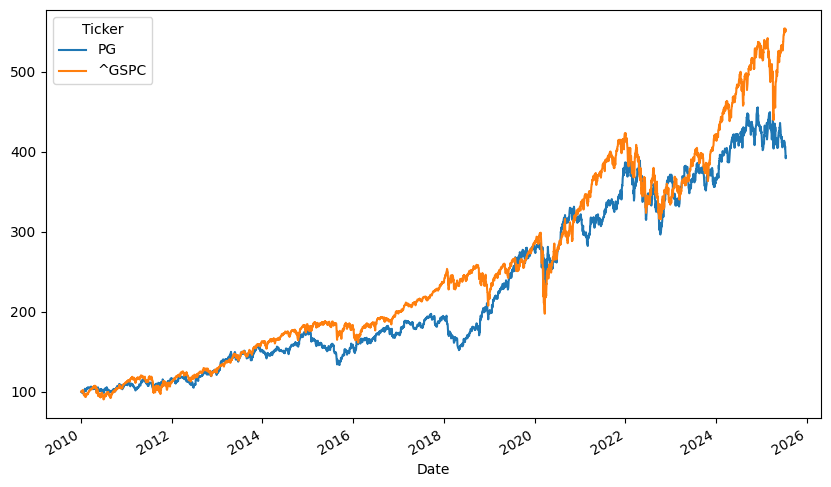

In [12]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 6))

In [ ]:
log_returns = np.log(pf_data / pf_data.shift(1)).dropna()
print("\nLog Returns:\n", log_returns)

returns_annual = log_returns.mean() * 250
print("\nMean Returns:\n", returns_annual)


Log Returns:
 Ticker            PG     ^GSPC
Date                          
2010-01-05  0.000327  0.003111
2010-01-06 -0.004755  0.000545
2010-01-07 -0.005438  0.003993
2010-01-08 -0.001323  0.002878
2010-01-11 -0.003979  0.001745
...              ...       ...
2025-07-09 -0.002346  0.006044
2025-07-10  0.006139  0.002742
2025-07-11 -0.009127 -0.003303
2025-07-14 -0.021171  0.001406
2025-07-15 -0.007049 -0.003964

[3905 rows x 2 columns]

Mean Returns:
 Ticker
PG       0.087456
^GSPC    0.109265
dtype: float64

Covariance Matrix:
 Ticker        PG     ^GSPC
Ticker                    
PG      0.029482  0.015626
^GSPC   0.015626  0.030474

Correlation Matrix:
 Ticker        PG     ^GSPC
Ticker                    
PG      1.000000  0.521312
^GSPC   0.521312  1.000000


In [20]:
cov_matrix = log_returns.cov() * 250
print("\nCovariance Matrix:\n", cov_matrix)

cor_matrix = log_returns.corr()
print("\nCorrelation Matrix:\n", cor_matrix)


Covariance Matrix:
 Ticker        PG     ^GSPC
Ticker                    
PG      0.029482  0.015626
^GSPC   0.015626  0.030474

Correlation Matrix:
 Ticker        PG     ^GSPC
Ticker                    
PG      1.000000  0.521312
^GSPC   0.521312  1.000000


In [23]:
num_assets = len(tickers)
print("\nNumber of Assets:", num_assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
print("\nWeights:", weights)


Number of Assets: 2

Weights: [0.53056266 0.46943734]


In [26]:
expected_pf_return = np.sum(returns_annual * weights)
print("\nExpected Portfolio Return:", expected_pf_return)


Expected Portfolio Return: 0.09769393261467886


In [29]:
expected_pf_var = np.dot(weights.T, np.dot(cov_matrix, weights))
print("\nExpected Portfolio Variance:", expected_pf_var)


Expected Portfolio Variance: 0.022798143700214223


In [30]:
expected_pf_vol = np.sqrt(expected_pf_var)
print("\nExpected Portfolio Volatility:", expected_pf_vol)


Expected Portfolio Volatility: 0.15099054175746976


In [39]:
pf_returns_t = []
pf_vol_t = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns_t.append(np.sum(returns_annual * weights))
    pf_vol_t.append(np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))))

print(pf_returns_t[:5])
print(pf_vol_t[:5])

[np.float64(0.0902873877960756), np.float64(0.09911399473682436), np.float64(0.08784595336826846), np.float64(0.09310042618642447), np.float64(0.1079471208312238)]
[np.float64(0.16238078141800494), np.float64(0.15122895501187386), np.float64(0.1702792943868111), np.float64(0.15566651814228913), np.float64(0.16965816450229318)]


In [40]:
pf_returns_t = np.array(pf_returns_t)
pf_vol_t = np.array(pf_vol_t)

print(pf_returns_t[:5])
print(pf_vol_t[:5])

[0.09028739 0.09911399 0.08784595 0.09310043 0.10794712]
[0.16238078 0.15122896 0.17027929 0.15566652 0.16965816]
